# Tarea 2 Evaluada

In [1]:
from math import comb
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7501)
seed = 7501
plt.style.use('ggplot')


## Distribuidora de autos

Una agencia distribuidora de autos, tiene disponible en exhibición para su venta los siguientes productos: 15 coches compactos, 5 coches de lujo, 8 camionetas y 7 jeeps. Un hotel va a realizar una compra de 5 unidades, la agencia está interesada en conocer la probabilidad de que el hotel compre 2 coches de lujo y 3 camionetas.

* Encuentre la probabilidad teórica de este evento.
* Use la ruleta para simular la probabilidad el inciso anterior.
* Realizar un código (en R, Matlab, Python, etc.) para simular el resultado del primer inciso

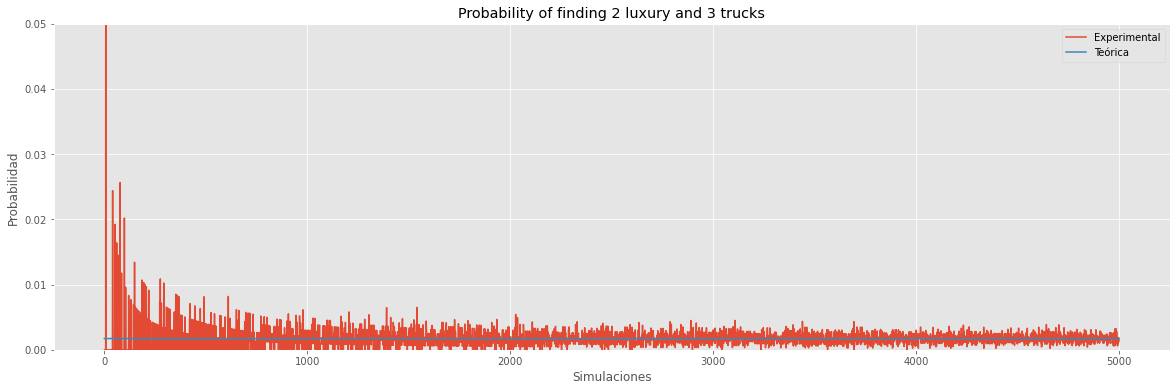

P(0, 2, 3, 0) = 0.00173
P_E(0, 2, 3, 0) = 0.00180


In [2]:
def problem_3():

    # First calculate theoretical probability
    p1_theoretical = comb(15, 0) * comb(5,2) * comb(8,3) * comb(7,0) / comb(35,5)
    
    # Now design a simulation to test the theoretical probability

    # Generate an array that encodes the population of the whole fleet
    # [compact, luxury, trucks, jeeps]
    # P(2 luxury and 3 trucks)
    # Looking for [0, 2, 3, 0]
    simuls = 5e3
    cars = [15, 5, 8, 7]
    gen = np.random.Generator(np.random.PCG64(seed))

    res = []
    for i in range(1, int(simuls)):
        samples = gen.multivariate_hypergeometric(cars, 5, size=int(i))
        prob = np.sum(np.sum(samples == np.array([0, 2, 3, 0]), axis = 1) == 4) / i
        res.append(prob)

    plt.figure(figsize=(20,6))
    plt.plot(np.arange(1, len(res)+1), res, label='Experimental')
    plt.plot(np.ones(len(res)) * p1_theoretical, label='Teórica')
    plt.ylim(0, 0.05)
    plt.xlabel('Simulaciones')
    plt.ylabel('Probabilidad')
    plt.legend()
    plt.title('Probability of finding 2 luxury and 3 trucks');
    plt.show()

    print(f'P(0, 2, 3, 0) = {p1_theoretical:.5f}')
    print(f'P_E(0, 2, 3, 0) = {res[-1]:.5f}')

problem_3()

## Problema canicas

En una urna se tienen 30 canicas rojas, 24 negras, 8 amarillas, 15 blancas y 13 verdes. Si se procede a sacar aleatoriamente 5 canicas sin reemplazo y nos interesa obtener la probabilidad de que 2 canicas sean del mismo color,

- Calcule la probabilidad exacta de este evento.
- Realice una simulación de 50 réplicas para obtener una estimación de la probabilidad solicitada en a)

In [3]:
draw, simuls = 5, 50
gen = np.random.Generator(np.random.PCG64(seed))
colors = [30, 24, 8, 15, 13]
gen = np.random.Generator(np.random.PCG64(seed))
samples = gen.multivariate_hypergeometric(colors, 5, size=int(simuls))

with_reps = samples[np.where(np.any(samples == 2, axis=1))]

counts = np.count_nonzero(with_reps == 2, axis=1)
len(with_reps[counts == 1]) / simuls

0.38